In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
data = pd.read_parquet("datas/final_df_day_2014_訓練資料.parquet")
# data = pd.read_parquet("datas/final_df_week_2014_訓練資料.parquet")
data.shape

(4443, 134)

In [120]:
print(list(data.columns))

['ES_Close', 'ES_1d_return', 'ES_5d_return', 'ES_20d_return', 'ES_60d_return', 'ES_120d_return', 'ES_ma5d', 'ES_ma20d', 'ES_ma60d', 'ES_ma120d', 'ES_trend5', 'ES_trend20', 'ES_trend60', 'ES_trend120', 'FFI_1d_return', 'FFI_5d_return', 'FFI_20d_return', 'FFI_60d_return', 'FFI_120d_return', 'FFI_ma5d', 'FFI_ma20d', 'FFI_ma60d', 'FFI_ma120d', 'FFI_trend5', 'FFI_trend20', 'FFI_trend60', 'FFI_trend120', 'VIX_Close', 'VIX_1d_return', 'VIX_5d_return', 'VIX_20d_return', 'VIX_60d_return', 'VIX_120d_return', 'VIX_ma5d', 'VIX_ma20d', 'VIX_ma60d', 'VIX_ma120d', 'VIX_trend5', 'VIX_trend20', 'VIX_trend60', 'VIX_trend120', 'TWII_1d_return', 'TWII_5d_return', 'TWII_20d_return', 'TWII_60d_return', 'TWII_120d_return', 'TWII_ma5d', 'TWII_ma20d', 'TWII_ma60d', 'TWII_ma120d', 'TWII_trend5', 'TWII_trend20', 'TWII_trend60', 'TWII_trend120', 'BRENT_1d_return', 'BRENT_5d_return', 'BRENT_20d_return', 'BRENT_60d_return', 'BRENT_120d_return', 'BRENT_ma5d', 'BRENT_ma20d', 'BRENT_ma60d', 'BRENT_ma120d', 'BRENT_tren

In [8]:
# 创建随机森林分类器
model = RandomForestClassifier(
    n_estimators=200,  # 树的数量
    max_depth=None,  # 树的最大深度
    min_samples_split=5,  # 分裂节点所需的最小样本数
    min_samples_leaf=1,  # 叶子节点所需的最小样本数
    max_features="log2",  # 每次分裂时考虑的特征数量
    random_state=1,
    n_jobs=-1,  # 使用所有CPU核心
)
# {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
# 划分训练集和测试集
train = data.iloc[:-500]
test = data.iloc[-500:]

predictors = [
    "ES_1d_return",
    "ES_5d_return",
    "ES_60d_return",
    "ES_120d_return",
    "ES_ma5d",
    "ES_ma60d",
    "ES_ma120d",
    "ES_trend5",
    "ES_trend60",
    "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend60",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "USD_1d_return",
    "USD_5d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend60",
    "GOLD_trend120",
    "ES_atr",
    "ES_k",
    "ES_d",
    "ES_macd_hist",
    "ES_month",
    "coreCPI",
    "coreCPI-漲跌",
    "coreCPI-YoY",
    "fedRate",
    "fedRate-漲跌",
    "fedRate-YoY",
    "NonFarm",
    "NonFarm-漲跌",
    "NonFarm-YoY",
    "PMI",
    "PMI-漲跌",
    "PMI-YoY",
    "T10Y",
    "T10Y-MA10",
    "T10Y-MA10_漲跌",
    "T10Y-MA10_YoY",
    "T10Y2Y",
    "T10Y2Y-MA10",
    "T10Y2Y-MA10_漲跌",
    "T10Y2Y-MA10_YoY",
]

# 训练模型
model.fit(train[predictors], train["next_higher"])

# 预测和评估
predictions = model.predict(test[predictors])
# 获取概率预测
proba_predictions = model.predict_proba(test[predictors])

# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors, "importance": model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.504

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.66      0.56       237
           1       0.54      0.37      0.44       263

    accuracy                           0.50       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.51      0.50      0.49       500


Top 10 Most Important Features:
             feature  importance
50          USD_ma5d    0.015405
46     USD_1d_return    0.015188
27    TWII_1d_return    0.014847
10          FFI_ma5d    0.014400
0       ES_1d_return    0.014367
66    GOLD_1d_return    0.014245
36   BRENT_1d_return    0.014190
70         GOLD_ma5d    0.014146
17     VIX_1d_return    0.013993
56  COPPER_1d_return    0.013911

Top 10 Most NOT Important Features:
          feature  importance
34    TWII_trend5    0.004529
84        fedRate    0.004478
80       ES_month    0.004362
24     VIX_trend5    0.004116
7       ES_trend5    0.004111
7

In [9]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


proba_predictions = model.predict_proba(test[predictors])
proba_predictions=proba_predictions[:, 1]
# 計算不同閾值下的精確度
thresholds = [0.48,0.5,0.53, 0.55,0.58,0.6,0.63,0.65]
results = []

for threshold in thresholds:
    # pred_binary = np.ones(len(proba_predictions))
    pred_binary = np.zeros(len(proba_predictions))
    # pred_binary[proba_predictions < threshold] = 1
    # pred_binary[proba_predictions >= threshold] = 0
    pred_binary[proba_predictions >= threshold] = 1
    pred_binary[proba_predictions < threshold] = 0
    prec = precision_score(test["next_higher"], pred_binary)
    rec = recall_score(test["next_higher"], pred_binary)
    f1 = f1_score(test["next_higher"], pred_binary)

    results.append(
        {
            "threshold": threshold,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            # "predictions_count": sum(pred_binary == 0),
            "predictions_count": sum(pred_binary == 1),
        }
    )

# 顯示不同閾值的結果
print("\nPerformance at different thresholds:")
for result in results:
    print(f"\nThreshold: {result['threshold']}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Number of Positive Predictions: {result['predictions_count']}")


Performance at different thresholds:

Threshold: 0.48
Precision: 0.5346
Recall: 0.5285
F1 Score: 0.5315
Number of Positive Predictions: 260

Threshold: 0.5
Precision: 0.5424
Recall: 0.3650
F1 Score: 0.4364
Number of Positive Predictions: 177

Threshold: 0.53
Precision: 0.5890
Recall: 0.1635
F1 Score: 0.2560
Number of Positive Predictions: 73

Threshold: 0.55
Precision: 0.5152
Recall: 0.0646
F1 Score: 0.1149
Number of Positive Predictions: 33

Threshold: 0.58
Precision: 0.2000
Recall: 0.0038
F1 Score: 0.0075
Number of Positive Predictions: 5

Threshold: 0.6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.63
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.65
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0


d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 01調參數-可以摺疊

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# 定义参数网格
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 14, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# 创建基础随机森林模型
base_model = RandomForestClassifier(random_state=1, n_jobs=-1)

# 创建GridSearchCV对象
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,  # 5折交叉验证
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
)

# 划分训练集和测试集
train = data.iloc[:-500]
test = data.iloc[-500:]

predictors = [
    "ES_1d_return",
    "ES_5d_return",
    "ES_60d_return",
    "ES_120d_return",
    "ES_ma5d",
    "ES_ma60d",
    "ES_ma120d",
    "ES_trend5",
    "ES_trend60",
    "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend60",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "USD_1d_return",
    "USD_5d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend60",
    "GOLD_trend120",
    "ES_atr",
    "ES_k",
    "ES_d",
    "ES_macd_hist",
    "ES_month",
    "coreCPI",
    "coreCPI-漲跌",
    "coreCPI-YoY",
    "fedRate",
    "fedRate-漲跌",
    "fedRate-YoY",
    "NonFarm",
    "NonFarm-漲跌",
    "NonFarm-YoY",
    "PMI",
    "PMI-漲跌",
    "PMI-YoY",
    "T10Y",
    "T10Y-MA10",
    "T10Y-MA10_漲跌",
    "T10Y-MA10_YoY",
    "T10Y2Y",
    "T10Y2Y-MA10",
    "T10Y2Y-MA10_漲跌",
    "T10Y2Y-MA10_YoY",
]

# 进行网格搜索
print("Starting Grid Search...")
grid_search.fit(train[predictors], train["next_higher"])

# 打印最佳参数
print("\nBest Parameters:")
print(grid_search.best_params_)

# 打印最佳分数
print("\nBest Score:", grid_search.best_score_)

# 使用最佳参数创建新模型
best_model = RandomForestClassifier(
    **grid_search.best_params_, random_state=1, n_jobs=-1
)

# 用全部训练数据训练最佳模型
best_model.fit(train[predictors], train["next_higher"])

# 在测试集上进行预测
predictions = best_model.predict(test[predictors])
proba_predictions = best_model.predict_proba(test[predictors])

# 打印模型评估报告
print("\nModel Evaluation on Test Set:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors, "importance": best_model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))

# 打印所有参数组合的结果
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("rank_test_score")
print("\nTop 5 Parameter Combinations:")
print(cv_results[["params", "mean_test_score", "std_test_score"]].head())

Starting Grid Search...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Best Score: 0.5034339554663425

Model Evaluation on Test Set:
Accuracy: 0.504

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.66      0.56       237
           1       0.54      0.37      0.44       263

    accuracy                           0.50       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.51      0.50      0.49       500


Top 10 Most Important Features:
             feature  importance
50          USD_ma5d    0.015405
46     USD_1d_return    0.015188
27    TWII_1d_return    0.014847
10          FFI_ma5d    0.014400
0       ES_1d_return    0.014367
66    GOLD_1d_return    0.014245
36   BRENT_1d_return    0.014190
70         GOLD_ma5d    0.014146
17     VIX_1d_return  

#####

In [69]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["next_higher"], preds)

0.5465116279069767

In [66]:
combined = pd.concat([test["next_higher"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

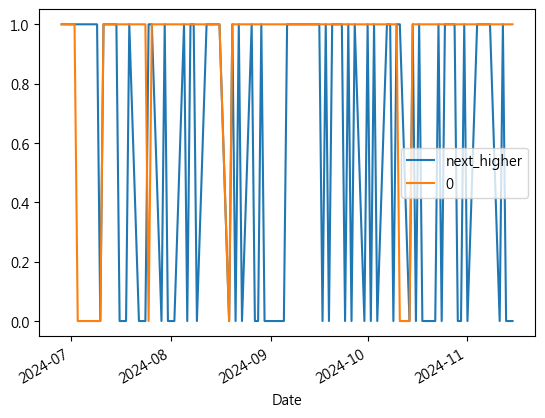

In [67]:
combined.plot()

In [47]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train["next_higher"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name="Predicitions")
    combined=pd.concat([test["next_higher"], preds], axis=1)
    return combined

def backtest(data, predictors, model, start=10, step=1):
    all_predictions =[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [48]:
predictions=backtest(data, predictors, model)

In [49]:
predictions["Predicitions"].value_counts()

1    345
0    200
Name: Predicitions, dtype: int64

In [50]:
precision_score(predictions["next_higher"], predictions["Predicitions"])

0.5710144927536231

In [51]:
predictions["next_higher"].value_counts()/predictions.shape[0]



1    0.590826
0    0.409174
Name: next_higher, dtype: float64